<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/err/Sector/silver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
itbees ->19084
pharmabees -> 4973
juniorbees -> 590104
bankbees -> 590106
goldbees -> 14428
silverbees -> 8080
autobees -> 7880
giltbees5y -> 3172
metaletf -> 24861
hangkongbees -> 590113
sdl26bees -> 3022
ltgiltbees -> 17700
mid150case -> 24077
nifty -> 99926000

'''

'\nitbees ->19084\npharmabees -> 4973\njuniorbees -> 590104\nbankbees -> 590106\ngoldbees -> 14428\nsilverbees -> 8080\nautobees -> 7880\ngiltbees5y -> 3172\nmetaletf -> 24861\nhangkongbees -> 590113\nsdl26bees -> 3022\nltgiltbees -> 17700\nmid150case -> 24077\nnifty -> 99926000\n\n'

In [2]:
!pip install pywt --q

!pip install pyotp --q
!pip install smartapi-python==1.4.1 --q
!pip install logzero --q
!pip install pykalman --q

ERROR: Could not find a version that satisfies the requirement pywt (from versions: none)
ERROR: No matching distribution found for pywt
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.4/249.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.7/145.7 kB 6.7 MB/s eta 0:00:00


In [3]:
from SmartApi import SmartConnect #or from SmartApi.smartConnect import SmartConnect
import pyotp
from logzero import logger
import time
import os
import urllib
import json
import pandas as pd
import datetime as dt


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
import yfinance as yf
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
sns.set()
register_matplotlib_converters()
import warnings
warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = 'retina'

In [5]:
api_key = 'xOHnB7MG'
username = 'M55123447'
pwd = '1471'
smartApi = SmartConnect(api_key)
try:
    token = "GJZACUQI2TTAIBHBA34XNFJURQ"
    totp = pyotp.TOTP(token).now()
except Exception as e:
    logger.error("Invalid Token: The provided token is not valid.")
    raise e

correlation_id = "abcde"
data = smartApi.generateSession(username, pwd, totp)

if data['status'] == False:
    logger.error(data)

else:
    # login api call
    # logger.info(f"You Credentials: {data}")
    authToken = data['data']['jwtToken']
    refreshToken = data['data']['refreshToken']
    # fetch the feedtoken
    feedToken = smartApi.getfeedToken()
    # fetch User Profile
    res = smartApi.getProfile(refreshToken)
    smartApi.generateToken(refreshToken)
    res=res['data']['exchanges']
#Download Nifty50 Index Data
params = {
           "exchange": "NSE",
           "symboltoken": '8080',
           "interval": "ONE_DAY",
           "fromdate": (dt.datetime(2021, 3, 7).strftime('%Y-%m-%d %H:%M')),
           "todate": (dt.datetime.today().strftime('%Y-%m-%d %H:%M'))
         }
nifty_data = smartApi.getCandleData(params)
nifty_data_format= pd.DataFrame(nifty_data["data"],
                               columns = ["Date","Open","High","Low","Close","Volume"])
nifty_data_format.reset_index(inplace=True)
#nifty_data_format.index = pd.to_datetime(nifty_data_format.index)
#nifty_data_format.index = nifty_data_format.index.tz_localize(None)

In [6]:
nifty_data_format.tail(2)

,index,Date,Open,High,Low,Close,Volume
883,883,2025-08-29T00:00:00+05:30,113.20,113.82,112.86,113.58,25713199
884,884,2025-09-01T00:00:00+05:30,118.05,118.95,117.80,118.59,49075978


In [7]:
t=nifty_data_format['Date']
s=nifty_data_format['Close']

In [8]:
t.shape,s.shape

((885,), (885,))

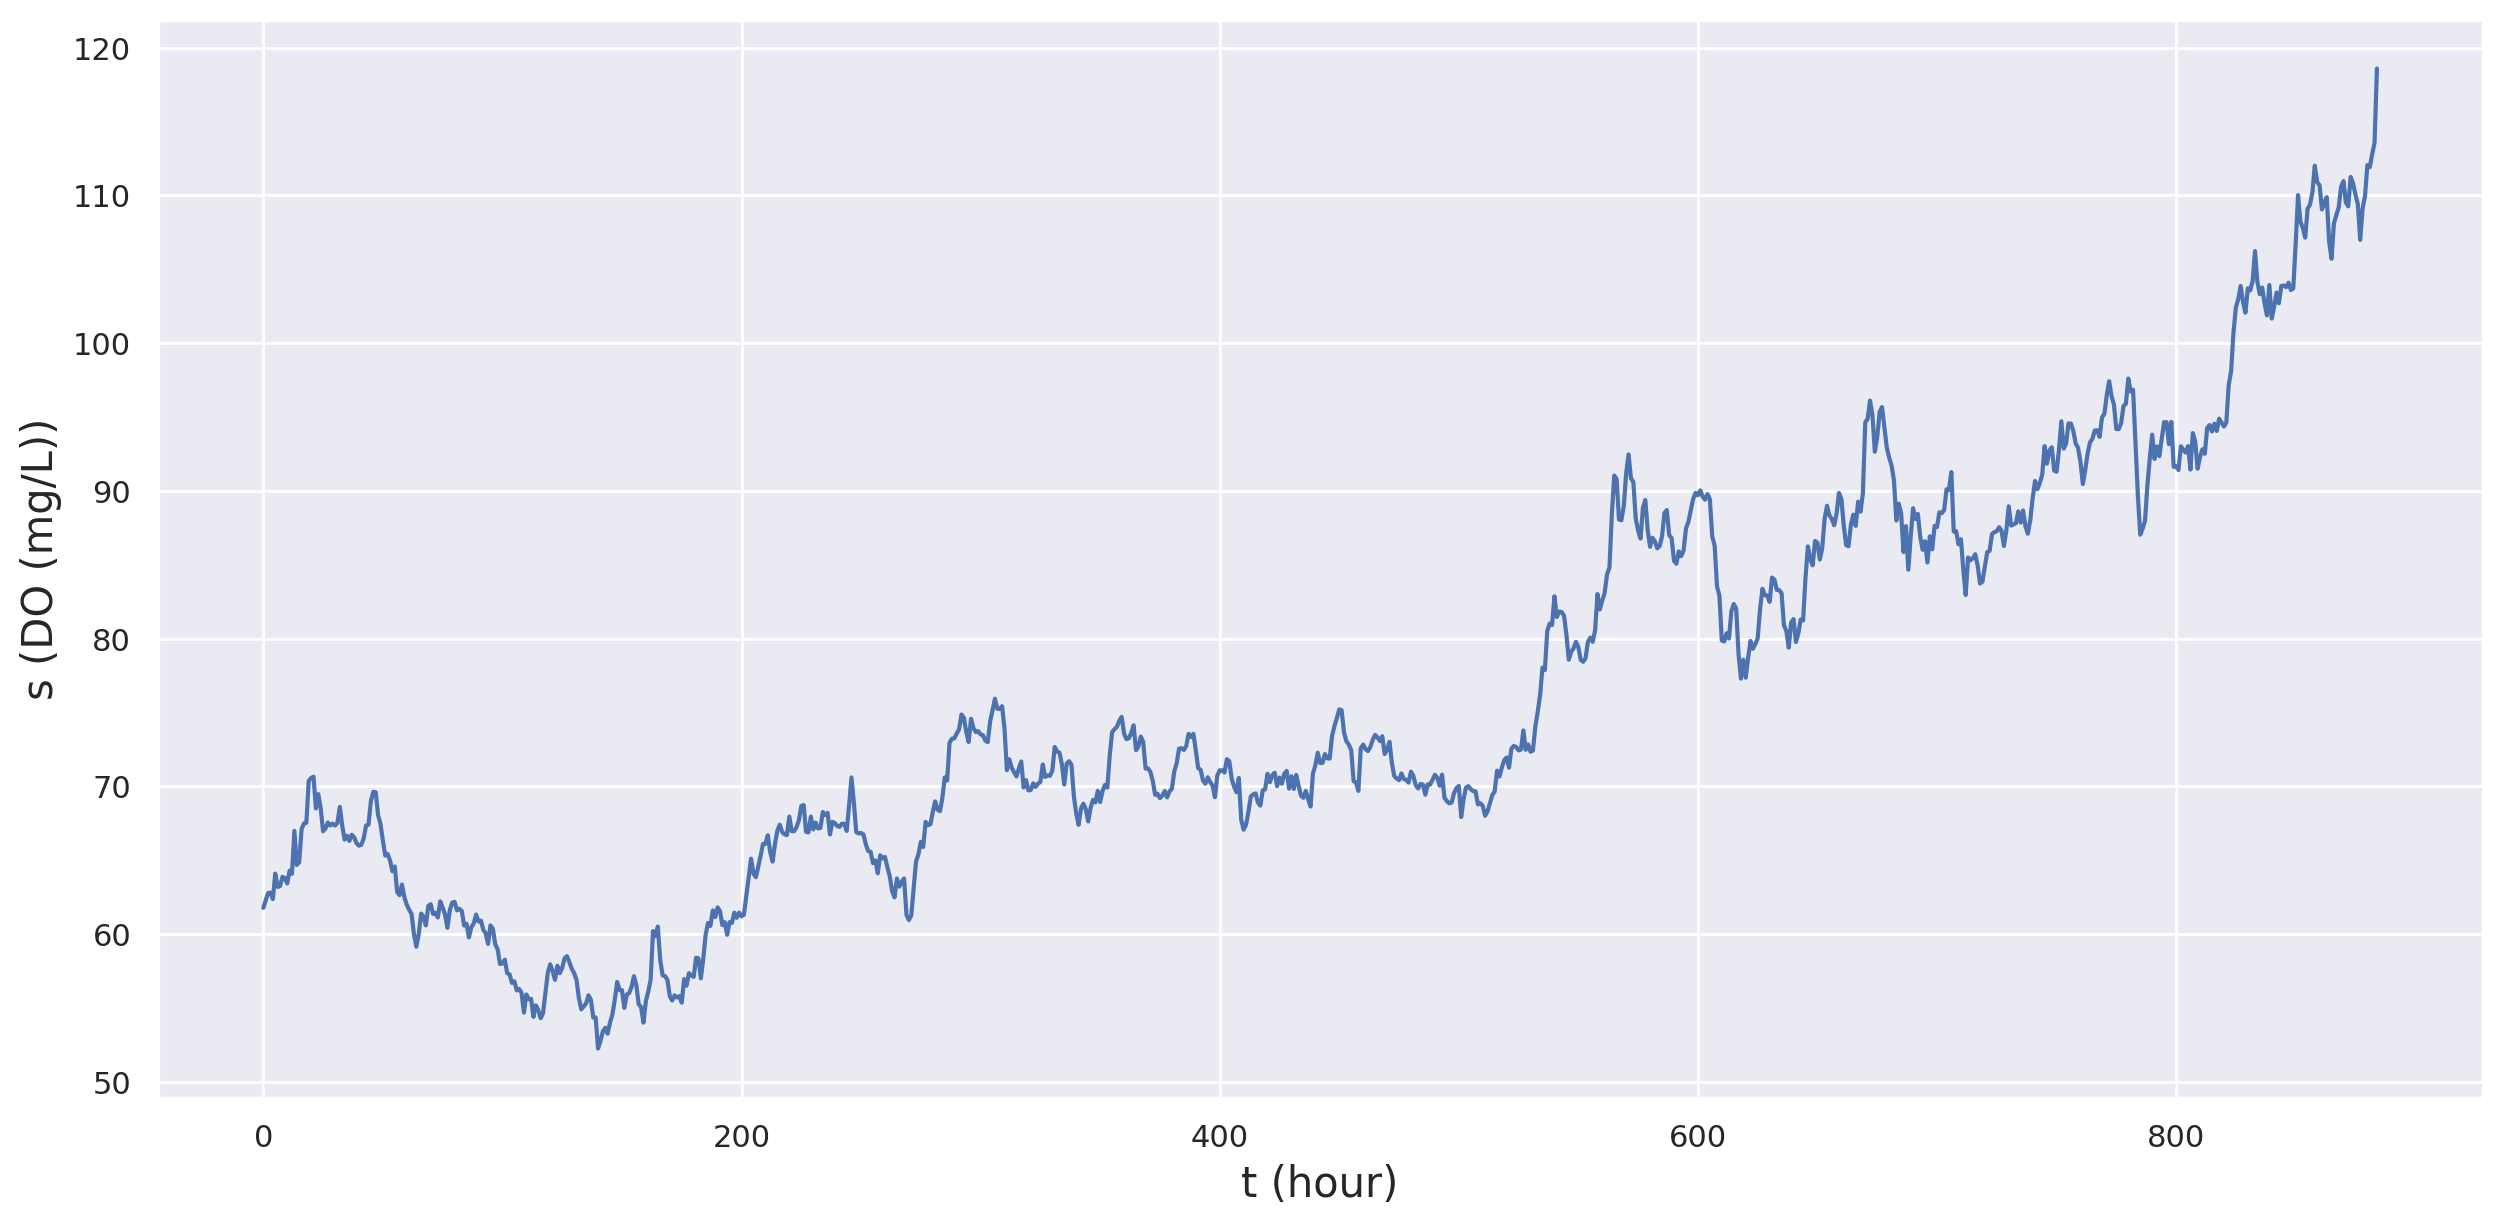

In [9]:
fig,ax = plt.subplots(figsize=(15,7))
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
ax.plot(s)
ax.set_xlabel('t (hour)',fontsize=15)
ax.set_ylabel('s (DO (mg/L))',fontsize=15)

plt.show()

In [10]:
coeffs = pywt.wavedec(s,'db6','sym',level=6)
(cA6,cD6,cD5,cD4,cD3,cD2,cD1) = coeffs

In [11]:
#print('cA6 = ',cA6)
#print('cD6 = ',cD6)

In [12]:
print(len(s))
print(len(cA6))
print(len(cD6))

885
24
24


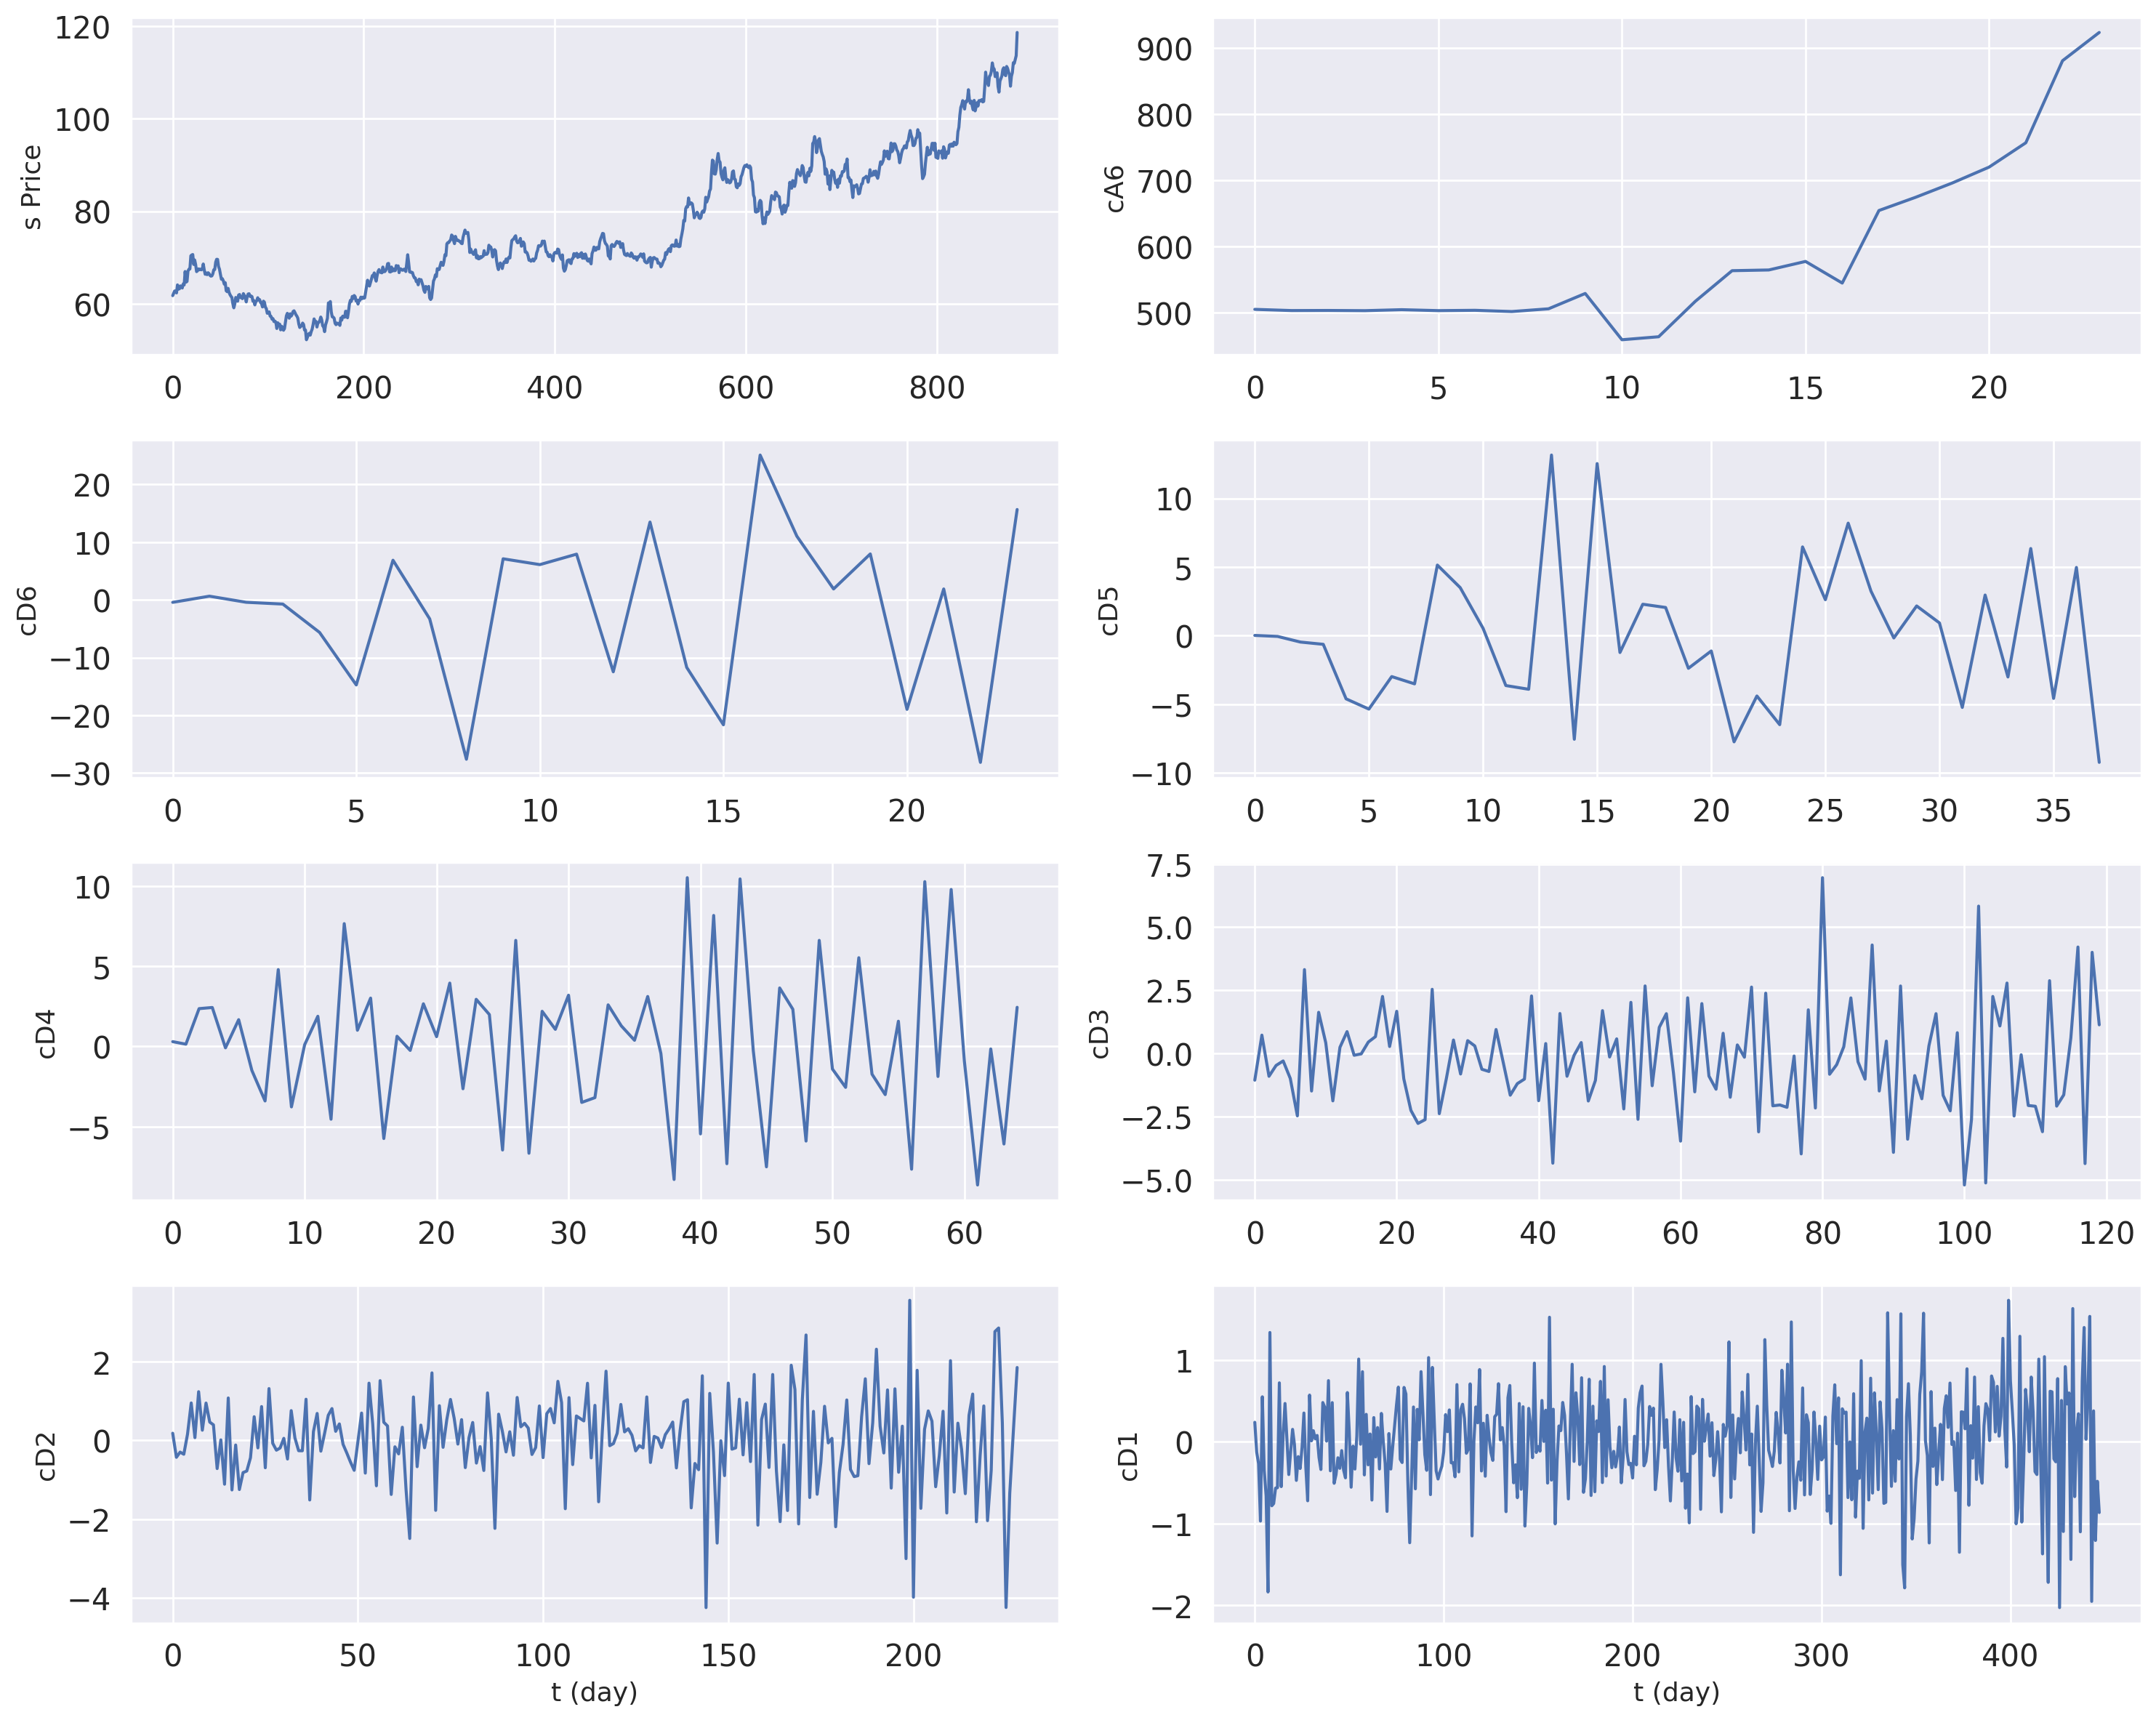

In [13]:
fig,axs = plt.subplots(4,2,figsize=(15,12))
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
axs[0,0].plot(s)
axs[0,0].set_ylabel('s Price',fontsize=13)
axs[0,1].plot(cA6)
axs[0,1].set_ylabel('cA6',fontsize=13)
axs[1,0].plot(cD6)
axs[1,0].set_ylabel('cD6',fontsize=13)
axs[1,1].plot(cD5)
axs[1,1].set_ylabel('cD5',fontsize=13)
axs[2,0].plot(cD4)
axs[2,0].set_ylabel('cD4',fontsize=13)
axs[2,1].plot(cD3)
axs[2,1].set_ylabel('cD3',fontsize=13)
axs[3,0].plot(cD2)
axs[3,0].set_ylabel('cD2',fontsize=13)
axs[3,0].set_xlabel('t (day)',fontsize=13)
axs[3,1].plot(cD1)
axs[3,1].set_ylabel('cD1',fontsize=13)
axs[3,1].set_xlabel('t (day)',fontsize=13)
plt.tight_layout()
plt.show()

In [14]:
s_r = pywt.waverec(coeffs,'db6','sym')

In [15]:
s_r = s_r[:-1]


In [16]:
s_r.shape

(885,)

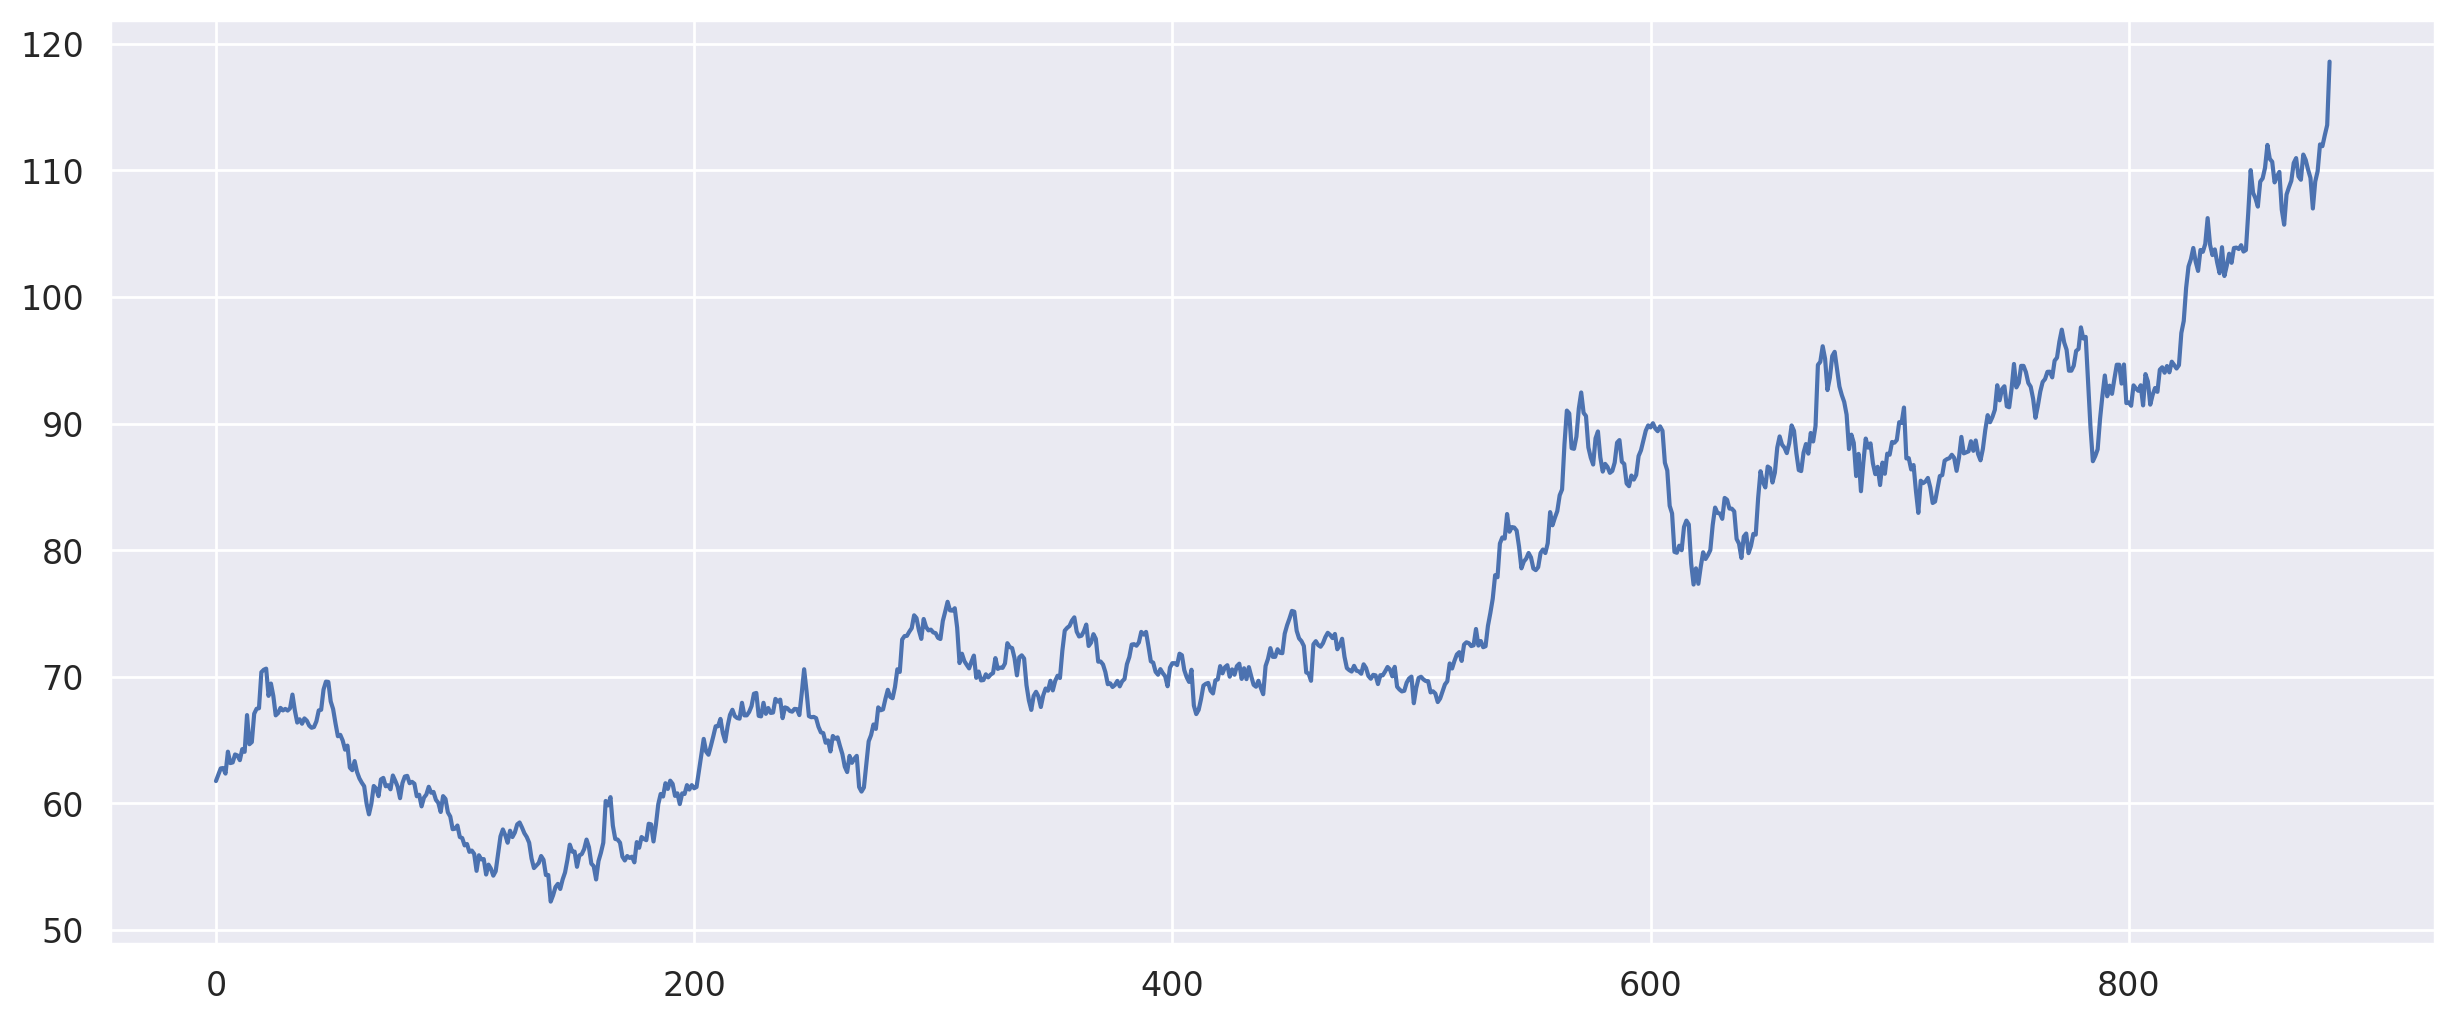

In [17]:
fig,ax = plt.subplots(figsize=(15,6),sharex=False)
#ax.plot(s.values)
ax.plot(s_r)
plt.show()

In [18]:
cA06 = np.zeros(len(cA6))
cD06 = np.zeros(len(cD6))
cD05 = np.zeros(len(cD5))
cD04 = np.zeros(len(cD4))
cD03 = np.zeros(len(cD3))
cD02 = np.zeros(len(cD2))
cD01 = np.zeros(len(cD1))

In [19]:
A6 = pywt.waverec((cA6,cD06,cD05,cD04,cD03,cD02,cD01),'db6','sym')
D6 = pywt.waverec((cA06,cD6,cD05,cD04,cD03,cD02,cD01),'db6','sym')
D5 = pywt.waverec((cA06,cD06,cD5,cD04,cD03,cD02,cD01),'db6','sym')
D4 = pywt.waverec((cA06,cD06,cD05,cD4,cD03,cD02,cD01),'db6','sym')
D3 = pywt.waverec((cA06,cD06,cD05,cD04,cD3,cD02,cD01),'db6','sym')
D2 = pywt.waverec((cA06,cD06,cD05,cD04,cD03,cD2,cD01),'db6','sym')
D1 = pywt.waverec((cA06,cD06,cD05,cD04,cD03,cD02,cD1),'db6','sym')


In [20]:
A6 = A6[:-1]
D6 = D6[:-1]
D5 = D5[:-1]
D4 = D4[:-1]
D3 = D3[:-1]
D2 = D2[:-1]
D1 = D1[:-1]

In [21]:
A5 = A6 + D6
A4 = A6 + D6 + D5
A3 = A6 + D6 + D5 + D4
A2 = A6 + D6 + D5 + D4 + D3
A1 = A6 + D6 + D5 + D4 + D3 + D2


In [22]:
s_r = A6 + D6 + D5 + D4 + D3 + D2 + D1

In [23]:
t.shape,D1.shape

((885,), (885,))

In [24]:
#t_s=t[1:]

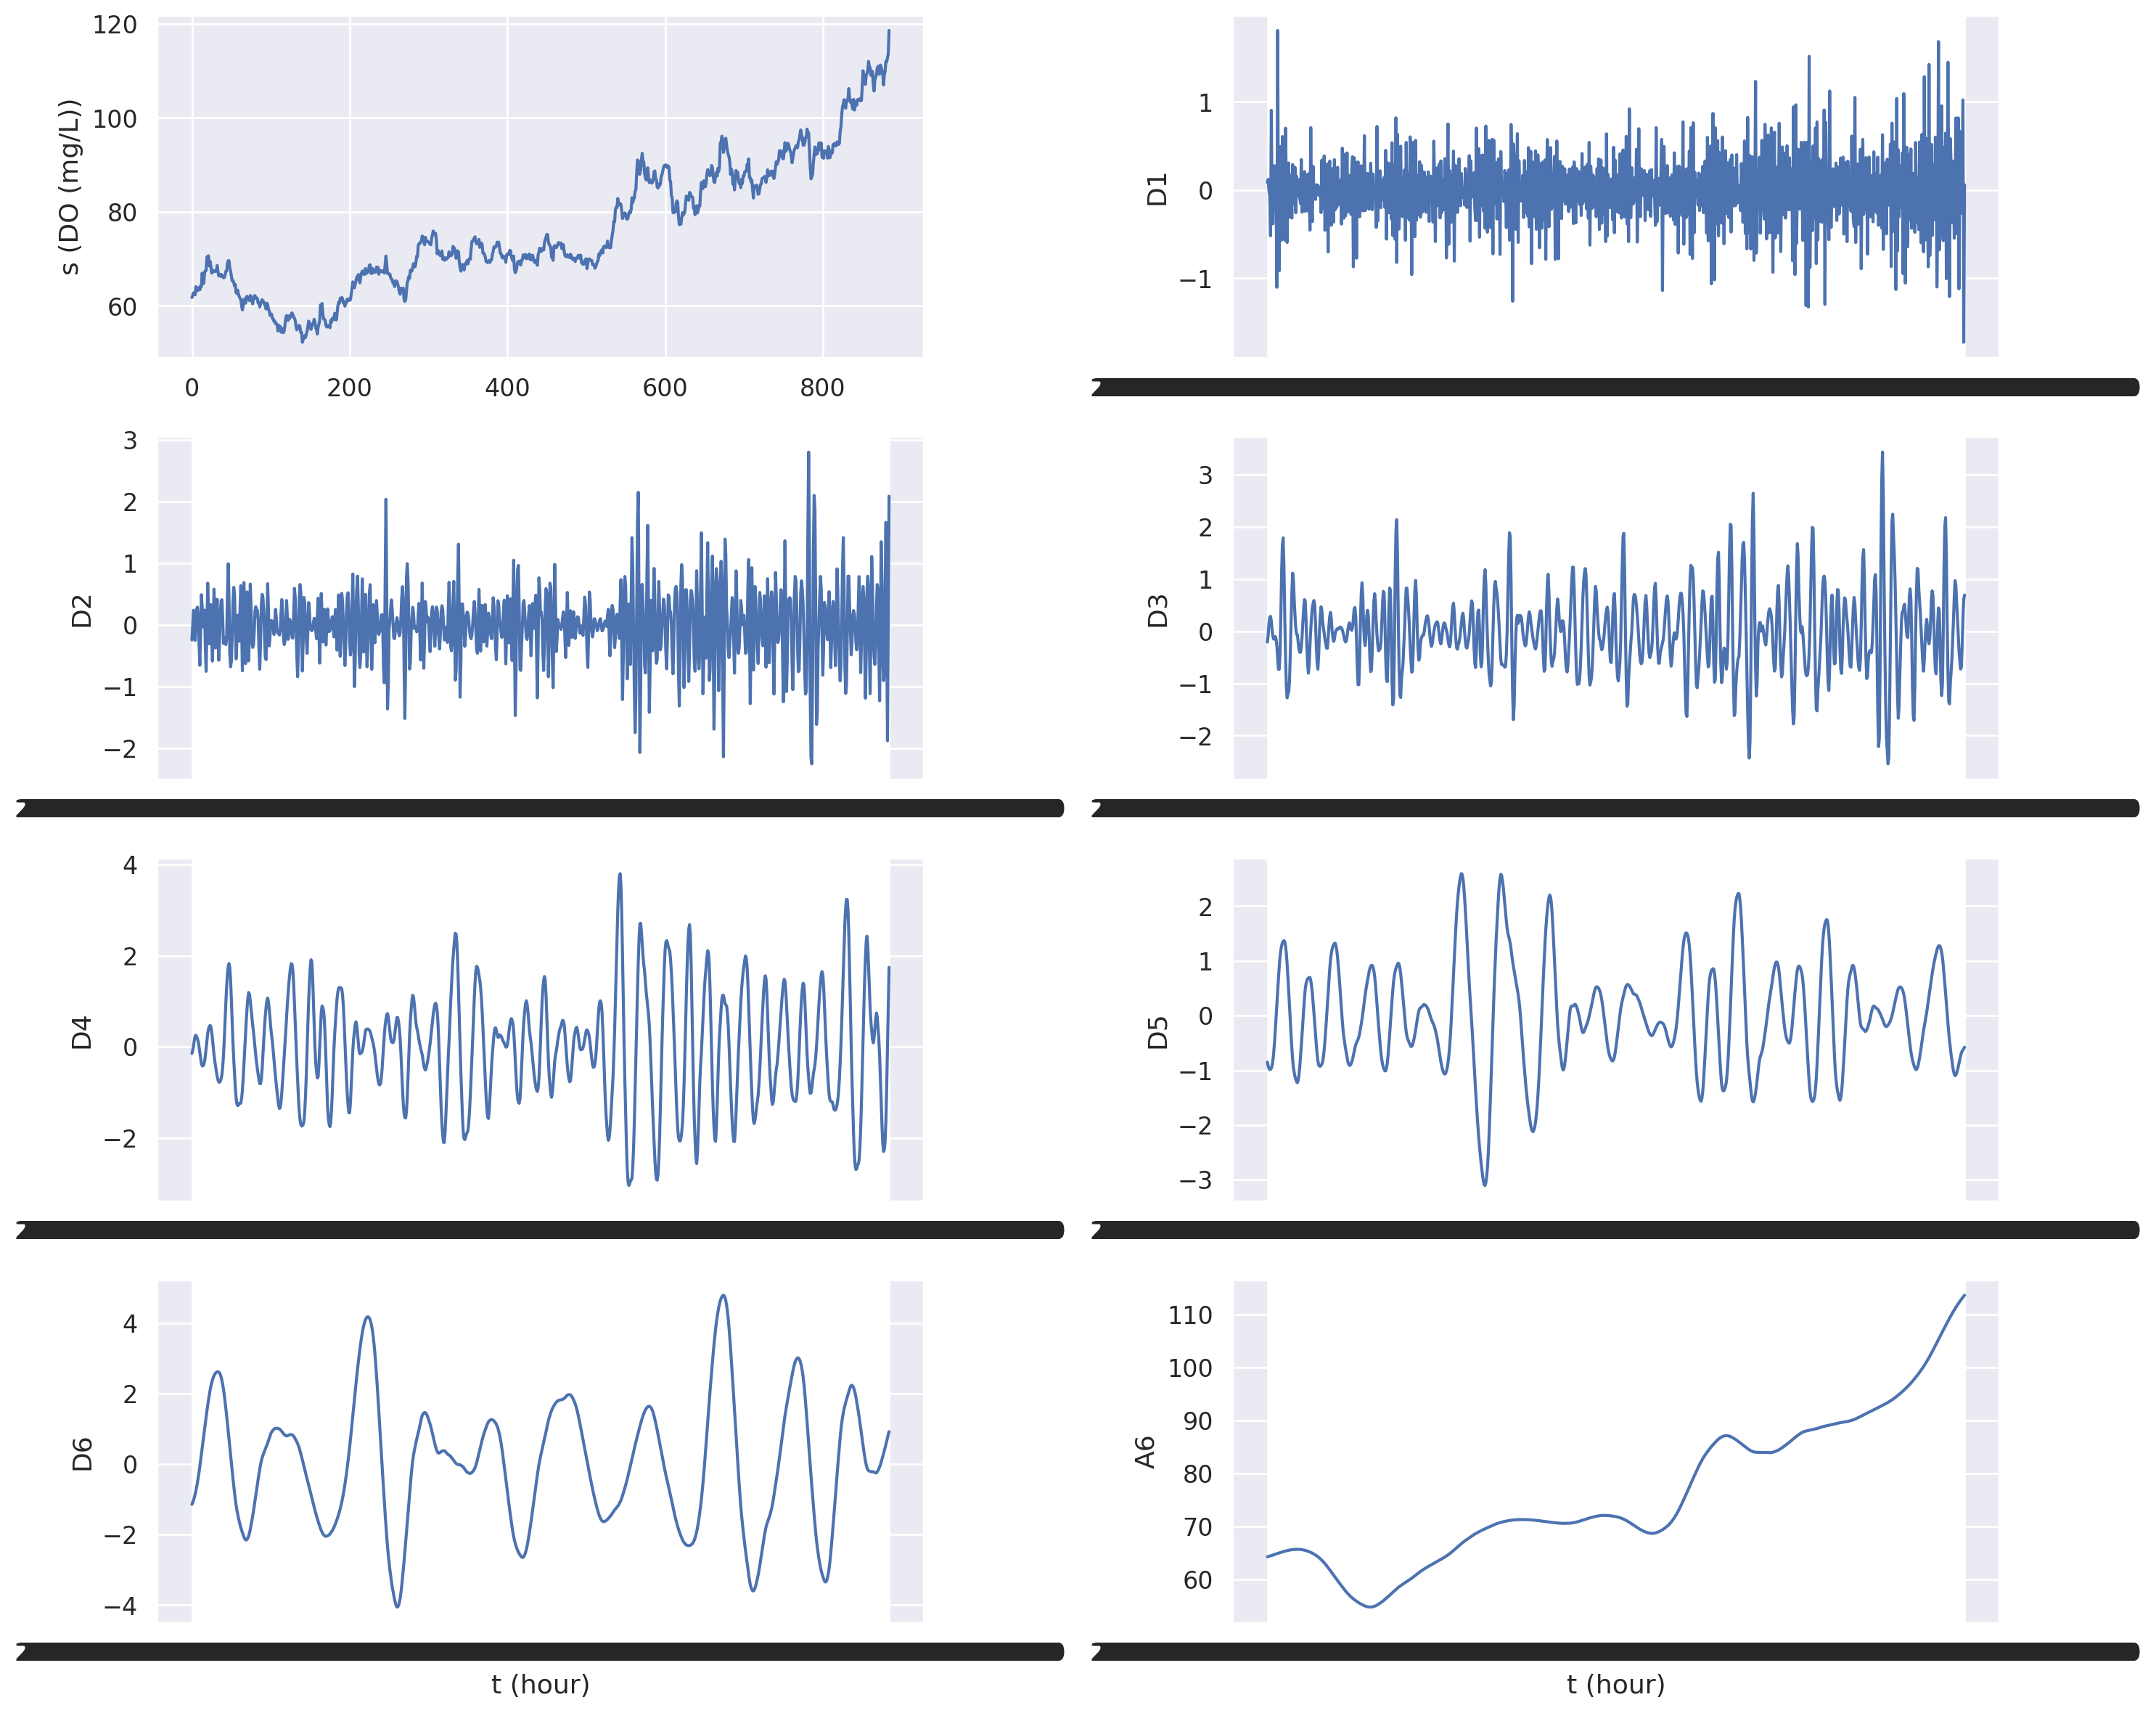

In [25]:
if t.shape==D1.shape:
    fig,axs = plt.subplots(4,2,figsize=(15,12))
    plt.rc('xtick',labelsize=12)
    plt.rc('ytick',labelsize=12)
    axs[0,0].plot(s)
    axs[0,0].set_ylabel('s (DO (mg/L))',fontsize=13)
    axs[0,1].plot(t,D1)
    axs[0,1].set_ylabel('D1',fontsize=13)
    axs[1,0].plot(t,D2)
    axs[1,0].set_ylabel('D2',fontsize=13)
    axs[1,1].plot(t,D3)
    axs[1,1].set_ylabel('D3',fontsize=13)
    axs[2,0].plot(t,D4)
    axs[2,0].set_ylabel('D4',fontsize=13)
    axs[2,1].plot(t,D5)
    axs[2,1].set_ylabel('D5',fontsize=13)
    axs[3,0].plot(t,D6)
    axs[3,0].set_ylabel('D6',fontsize=13)
    axs[3,0].set_xlabel('t (hour)',fontsize=13)
    axs[3,1].plot(t,A6)
    axs[3,1].set_ylabel('A6',fontsize=13)
    axs[3,1].set_xlabel('t (hour)',fontsize=13)
    plt.tight_layout()

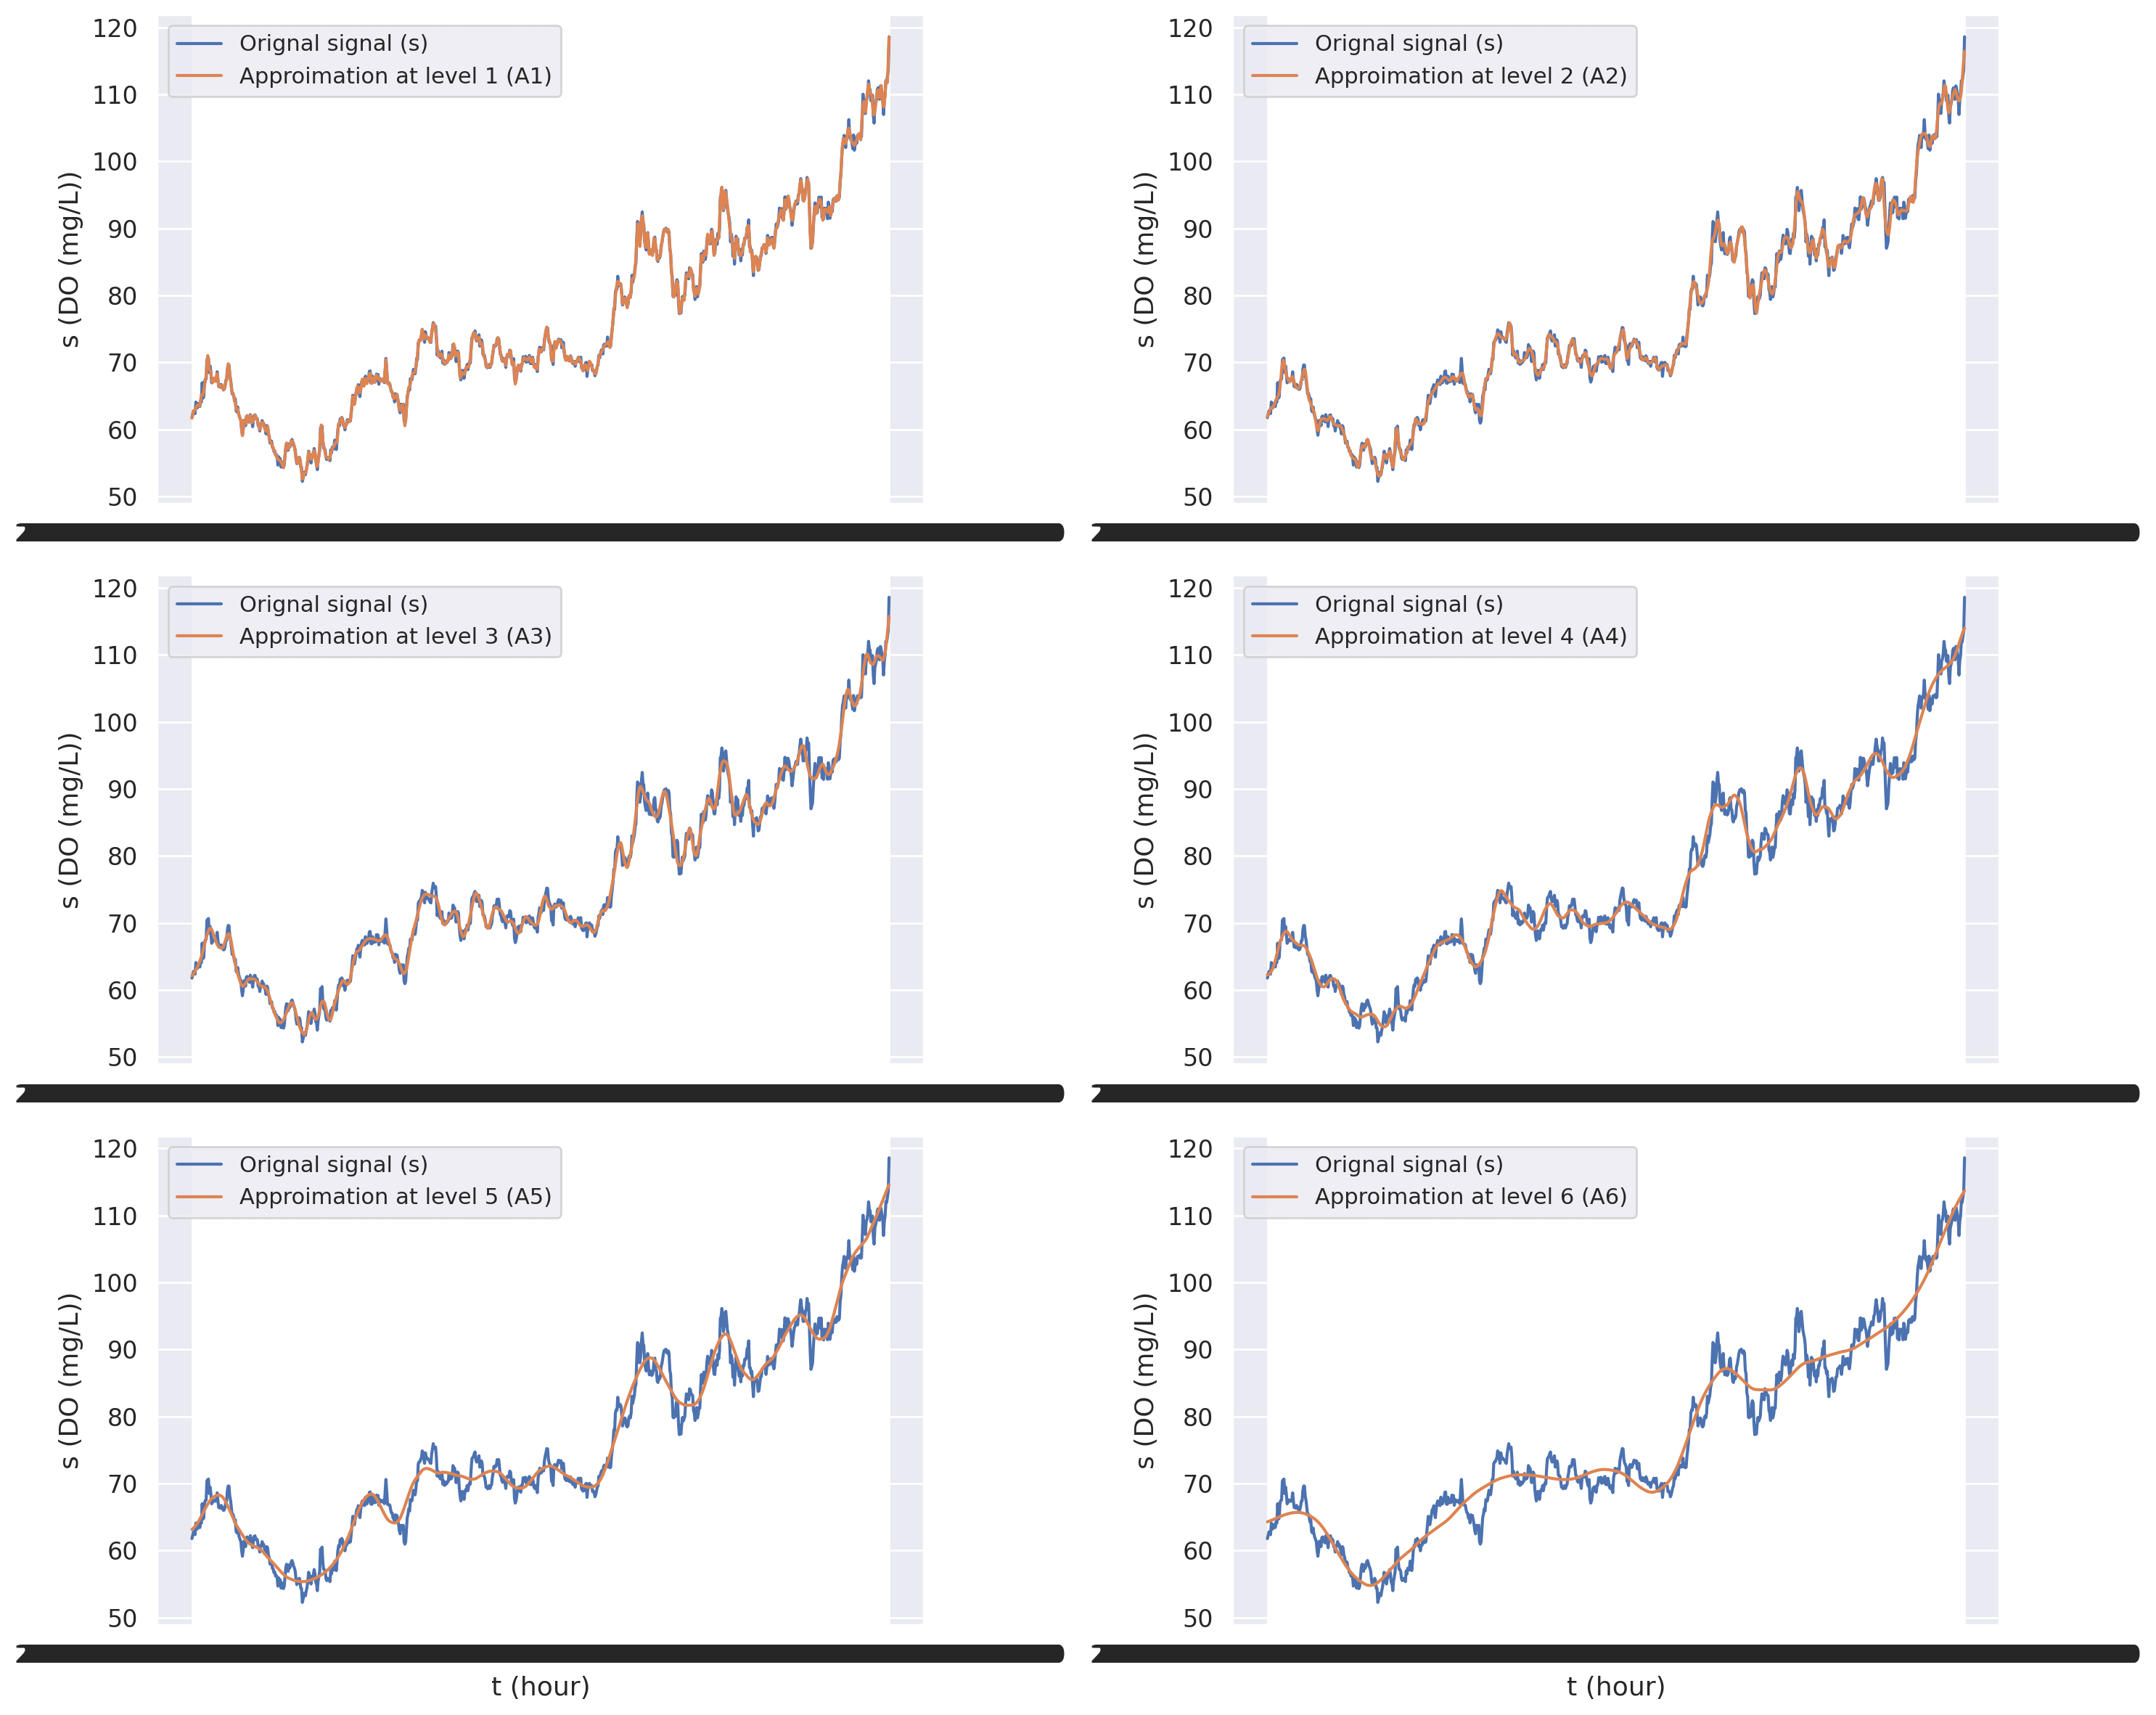

In [26]:
if t.shape==D1.shape:
    fig,axs = plt.subplots(3,2,figsize=(15,12))
    plt.rc('xtick',labelsize=12)
    plt.rc('ytick',labelsize=12)
    axs[0,0].plot(t,s)
    axs[0,0].plot(t[:],A1)
    axs[0,0].set_ylabel('s (DO (mg/L))',fontsize=13)
    axs[0,0].legend(('Orignal signal (s)','Approimation at level 1 (A1)'),loc='best')
    axs[0,1].plot(t,s)
    axs[0,1].plot(t[:],A2)
    axs[0,1].set_ylabel('s (DO (mg/L))',fontsize=13)
    axs[0,1].legend(('Orignal signal (s)','Approimation at level 2 (A2)'),loc='best')
    axs[1,0].plot(t,s)
    axs[1,0].plot(t[:],A3)
    axs[1,0].set_ylabel('s (DO (mg/L))',fontsize=13)
    axs[1,0].legend(('Orignal signal (s)','Approimation at level 3 (A3)'),loc='best')
    axs[1,1].plot(t,s)
    axs[1,1].plot(t[:],A4)
    axs[1,1].set_ylabel('s (DO (mg/L))',fontsize=13)
    axs[1,1].legend(('Orignal signal (s)','Approimation at level 4 (A4)'),loc='best')
    axs[2,0].plot(t,s)
    axs[2,0].plot(t[:],A5)
    axs[2,0].set_ylabel('s (DO (mg/L))',fontsize=13)
    axs[2,0].legend(('Orignal signal (s)','Approimation at level 5 (A5)'),loc='best')
    axs[2,0].set_xlabel('t (hour)',fontsize=13)
    axs[2,1].plot(t,s)
    axs[2,1].plot(t[:],A6)
    axs[2,1].set_ylabel('s (DO (mg/L))',fontsize=13)
    axs[2,1].legend(('Orignal signal (s)','Approimation at level 6 (A6)'),loc='best')
    axs[2,1].set_xlabel('t (hour)',fontsize=13)
    plt.tight_layout()

    plt.show()

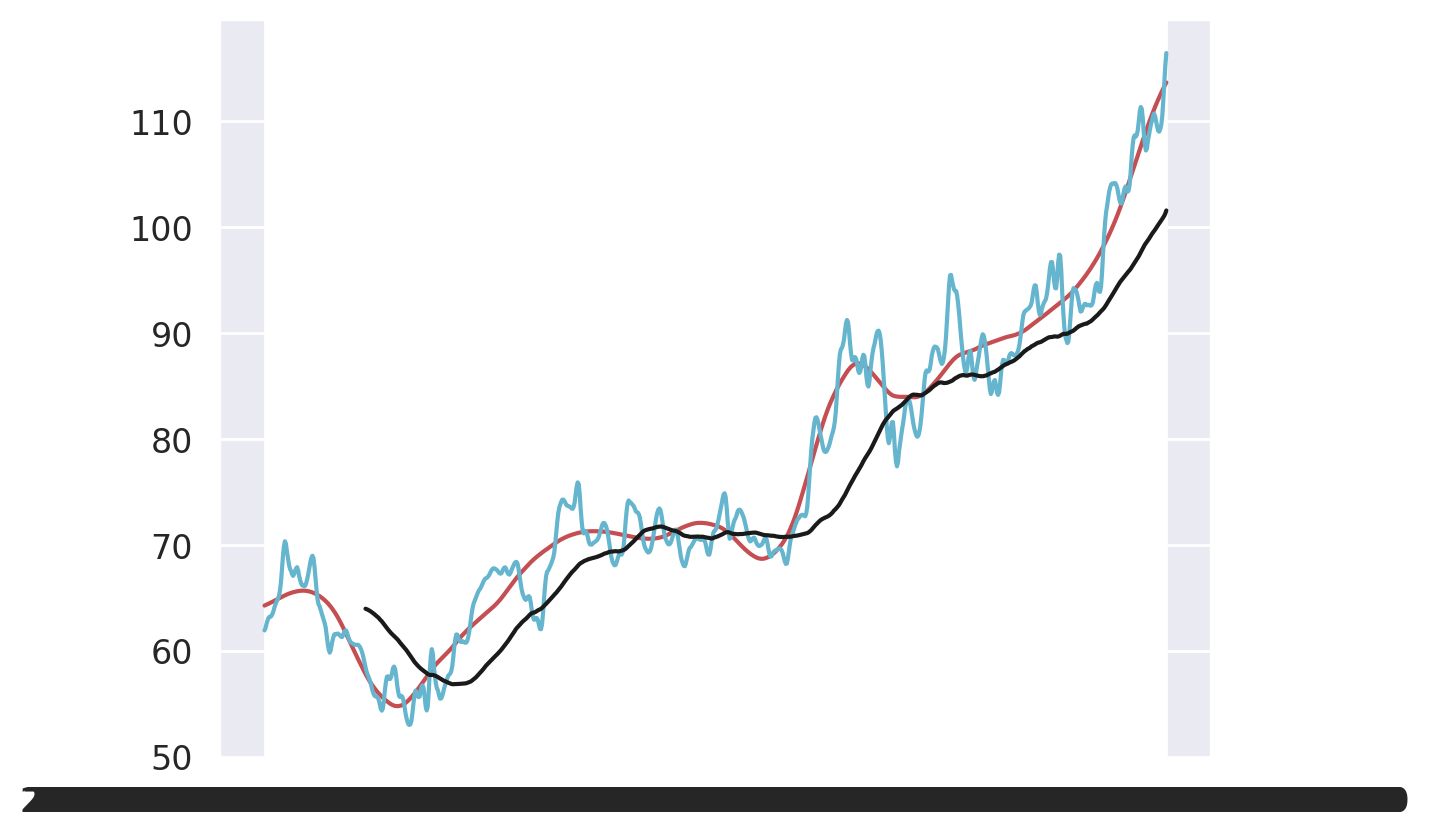

In [27]:
if t.shape!=D1.shape:
    plt.plot(t[1:],A6,color='r')
    plt.plot(t[1:],A2,color='c')
    plt.plot(t[1:],s[1:].rolling(window=100).mean(),'k');
else:
    plt.plot(t[:],A6,color='r')
    plt.plot(t[:],A2,color='c')
    plt.plot(t,s[:].rolling(window=100).mean(),'k');

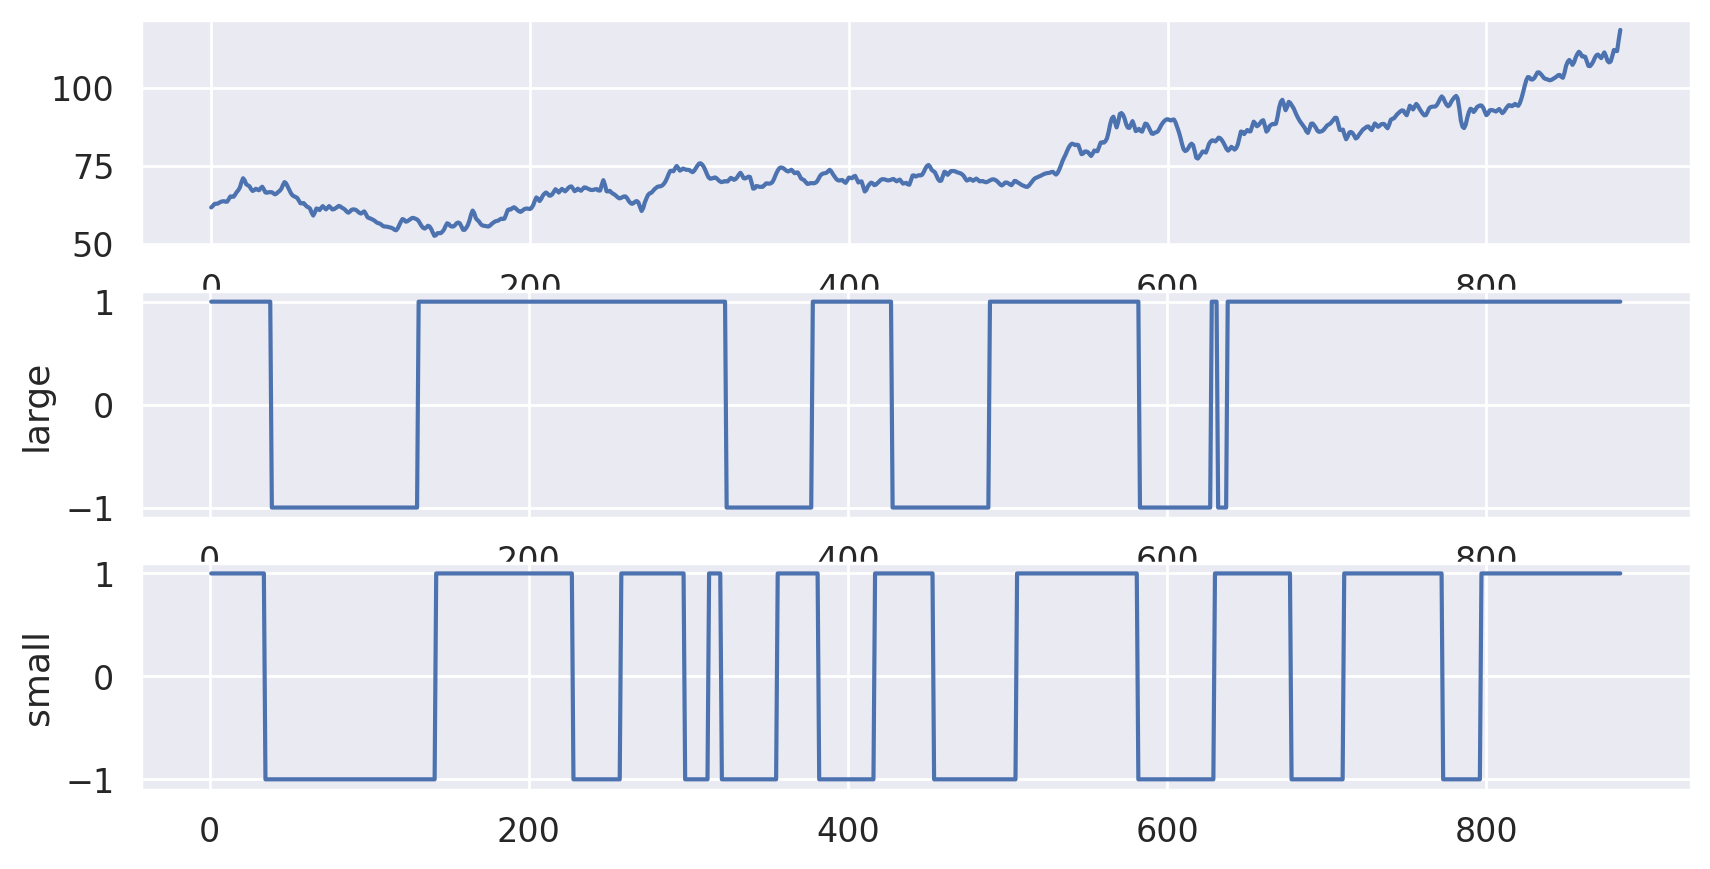

In [28]:
fig,axs = plt.subplots(3,1,figsize=(10,5))
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
axs[1].plot(np.sign(pd.Series(A6).diff()))
axs[2].plot(np.sign(pd.Series(A5).diff()))
axs[2].set_ylabel('small',fontsize=13)
axs[1].set_ylabel('large',fontsize=13)
axs[0].plot(A1)
plt.show()

In [29]:
A1.shape,A6.shape

((885,), (885,))

In [30]:
recon1=pd.concat([nifty_data_format,pd.Series(A6)],axis=1)

In [31]:
recon=pd.concat([nifty_data_format,pd.Series(A5)],axis=1)

In [32]:
recon1.tail(2)

,index,Date,Open,High,Low,Close,Volume,0
883,883,2025-08-29T00:00:00+05:30,113.20,113.82,112.86,113.58,25713199,113.474784
884,884,2025-09-01T00:00:00+05:30,118.05,118.95,117.80,118.59,49075978,113.661420


In [33]:
recon = recon.rename(columns={0: "Series"})


In [34]:
recon1 = recon1.rename(columns={0: "Series"})


In [35]:
recon['signal']=np.sign(recon['Series'].diff())
recon1['signal']=np.sign(recon1['Series'].diff())


In [36]:
# Ensure Date column is datetime
nifty_data_format["Date"] = pd.to_datetime(nifty_data_format["Date"])
recon1["Date"] = pd.to_datetime(recon1["Date"])
recon["Date"] = pd.to_datetime(recon["Date"])

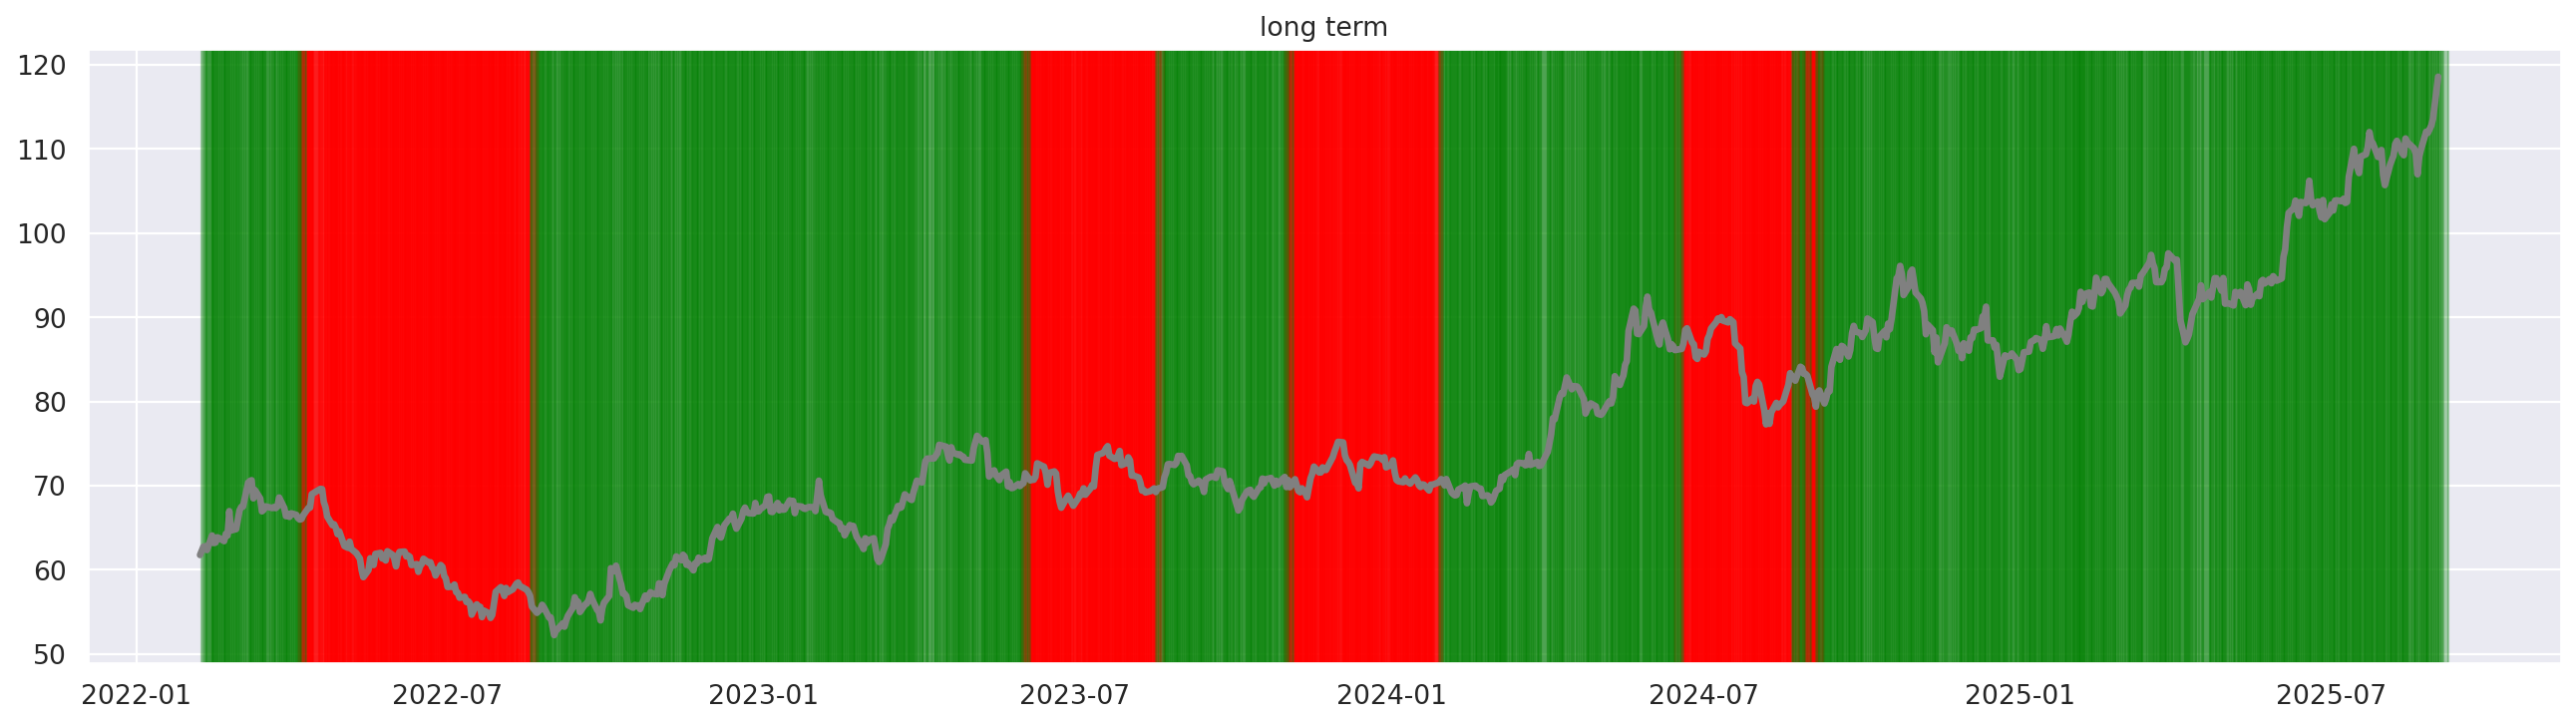

In [37]:
import datetime
plt.figure(figsize=(20,5), dpi=80)
plt.plot(nifty_data_format["Date"], (nifty_data_format['Close'].values),color='grey',linewidth=3);
recessions = recon1.loc[recon1["signal"] == -1, 'Date']
nonrecession = recon1.loc[recon1['signal']==1,'Date']
for day in recessions:
    plt.axvspan(day, day + datetime.timedelta(days=6), color="red", alpha=0.5)
for day in nonrecession:
    plt.axvspan(day, day + datetime.timedelta(days=6), color="green", alpha=0.3)
plt.title('long term')
plt.show()

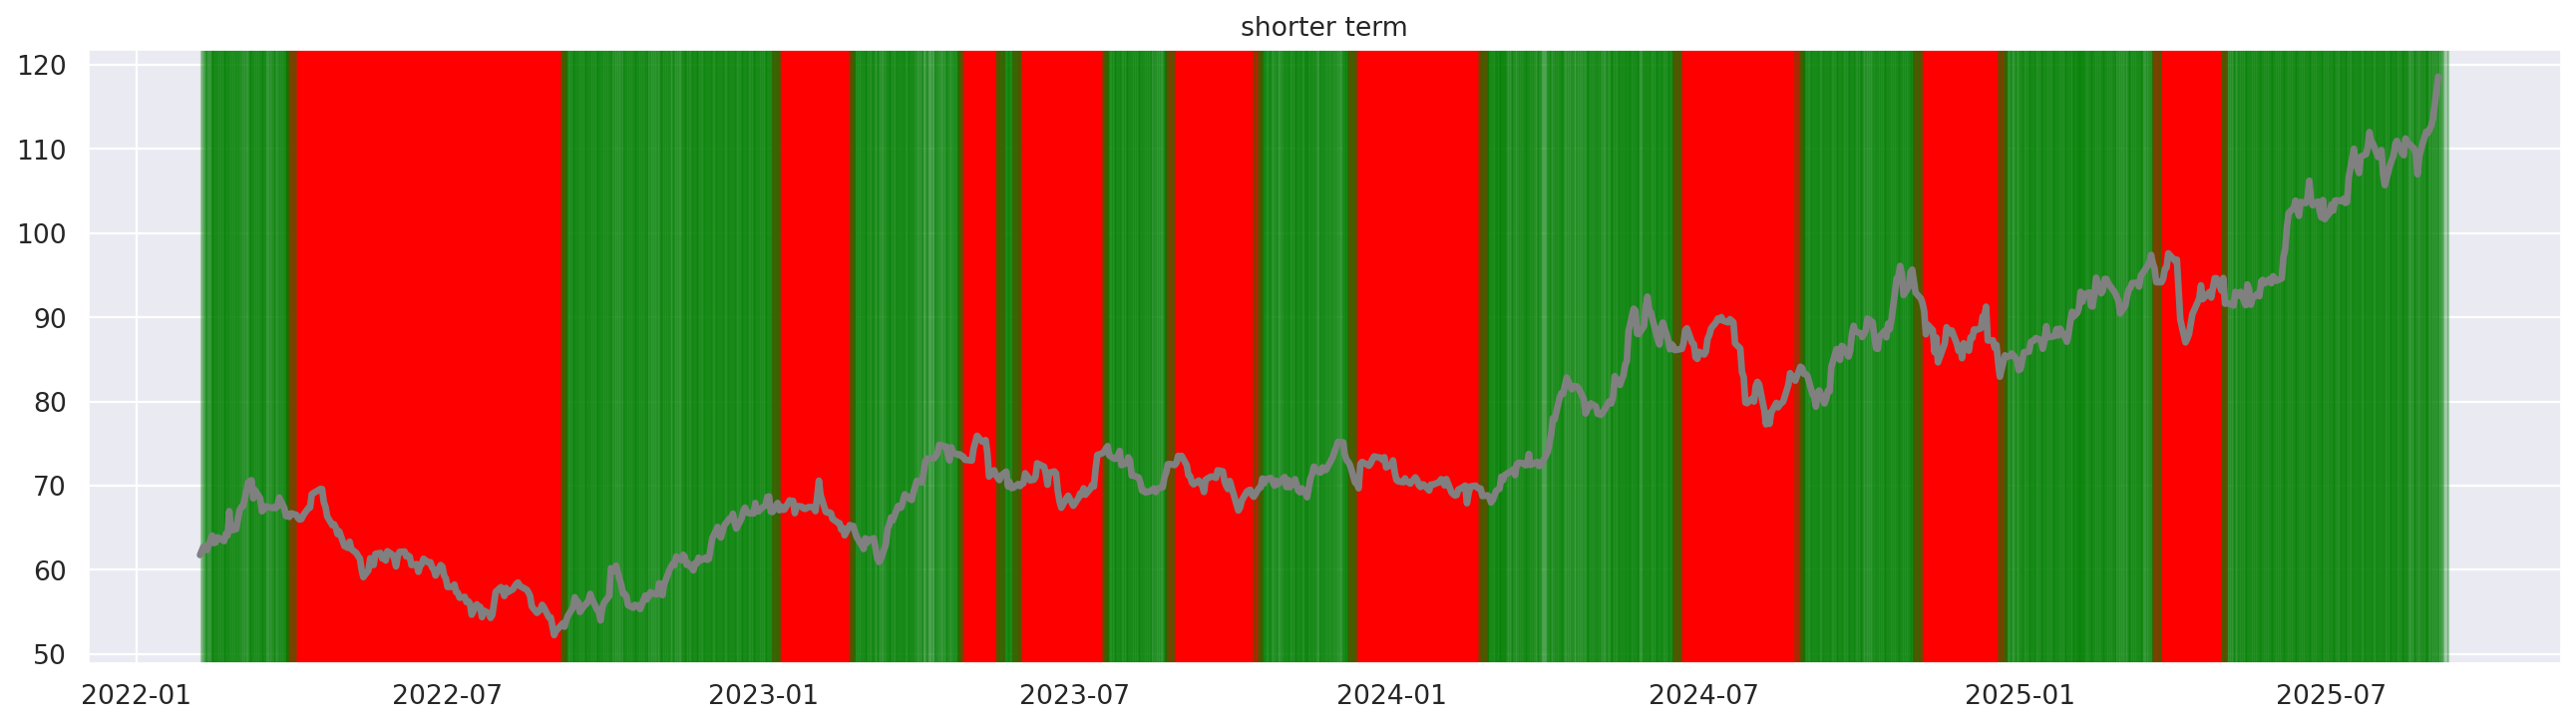

In [38]:
import datetime
plt.figure(figsize=(20,5), dpi=80)
plt.plot(nifty_data_format["Date"], (nifty_data_format['Close'].values),color='grey',linewidth=3);
recessions = recon.loc[recon["signal"] == -1, 'Date']
nonrecession = recon.loc[recon['signal']==1,'Date']
for day in recessions:
    plt.axvspan(day, day + datetime.timedelta(days=6), color="red", alpha=0.9)
for day in nonrecession:
    plt.axvspan(day, day + datetime.timedelta(days=6), color="green", alpha=0.3)
plt.title('shorter term')
plt.show()

In [39]:
print('short term')
recon.signal.iloc[-2:]

short term


,signal
883,1.0
884,1.0


In [40]:
print('long term')
recon1.signal.iloc[-2:]

long term


,signal
883,1.0
884,1.0


In [41]:
recon.tail(5)

,index,Date,Open,High,Low,Close,Volume,Series,signal
880,880,2025-08-25 00:00:00+05:30,111.67,112.50,111.65,112.05,13391397,113.444958,1.0
881,881,2025-08-26 00:00:00+05:30,112.15,112.79,111.33,111.91,22085218,113.740428,1.0
882,882,2025-08-28 00:00:00+05:30,112.60,112.97,112.30,112.78,32127716,114.032292,1.0
883,883,2025-08-29 00:00:00+05:30,113.20,113.82,112.86,113.58,25713199,114.313152,1.0
884,884,2025-09-01 00:00:00+05:30,118.05,118.95,117.80,118.59,49075978,114.581610,1.0


In [42]:
recon1.tail(2)

,index,Date,Open,High,Low,Close,Volume,Series,signal
883,883,2025-08-29 00:00:00+05:30,113.20,113.82,112.86,113.58,25713199,113.474784,1.0
884,884,2025-09-01 00:00:00+05:30,118.05,118.95,117.80,118.59,49075978,113.661420,1.0
